<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

In [2]:
!pip install statsmodels

In [3]:
!pip install numpy

In [4]:
!pip install scipy

In [5]:
!pip install pandas

In [6]:
!pip install sklearn

In [7]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 44.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [9]:
!pip install pyramid

     |████████████████████████████████| 246 kB 5.3 MB/s 
     |████████████████████████████████| 114 kB 45.0 MB/s 
     |████████████████████████████████| 251 kB 46.2 MB/s 


In [10]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose



In [12]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [13]:
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=['Date'], index_col='Date')
#df.tail(2018)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2018 entries, 2012-01-03 to 2020-01-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2018 non-null   float64
 1   High       2018 non-null   float64
 2   Low        2018 non-null   float64
 3   Close      2018 non-null   float64
 4   Adj Close  2018 non-null   float64
 5   Volume     2018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.4 KB


In [15]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699.0
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805.0
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412.0
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792.0
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878.0
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644.0
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813.0


In [16]:
start_date = datetime(2012,1,3)
end_date = datetime(2020,1,9)
lim_df = df[start_date:end_date]['Adj Close']
lim_df

Date
2012-01-03     56.011238
2012-01-04     56.312252
2012-01-05     56.937424
2012-01-06     57.532646
2012-01-09     57.441391
                 ...    
2020-01-03    293.598297
2020-01-06    295.937744
2020-01-07    294.545959
2020-01-08    299.284088
2020-01-09    305.641113
Name: Adj Close, Length: 2018, dtype: float64

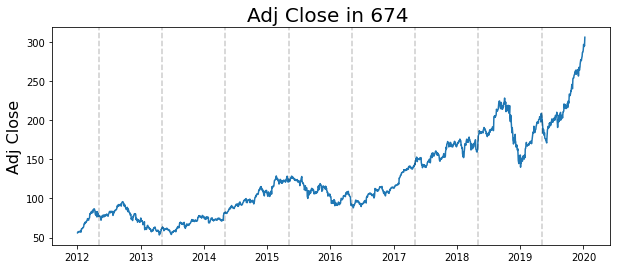

In [18]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Adj Close in 674 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-05-05'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [19]:
#first_diff = lim_df.diff()[1:]
first_diff = lim_df.diff()

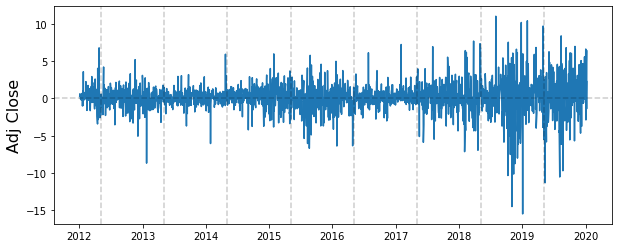

In [20]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 763 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-05-05'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [21]:
import numpy as np

# Get training and testing sets
train_end = datetime(2017,5,5)
test_end = datetime(2020,1,9)

#train_data = list(df[:train_end]['Adj Close'])
#test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = lim_df[:train_end]['Adj Close']
#test_data = lim_df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = list(lim_df[:train_end]['Adj Close'])
#test_data = list(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]


#train_data = list(lim_df[:1345]['Adj Close'])
#test_data = list(lim_df[1345:]['Adj Close'])

#test_data = list(df[train_end:test_end]['Adj Close'])

#train_data = df[df.index < '2017-05-05'], df[df.index >= '2012-01-03']
#test_data = df[df.index < '2020-01-09'], df[df.index >= '2017-05-05']

#train_data, test_data = lim_df[lim_df.index < '2012-01-03'], lim_df[lim_df.index >= '2020-01-09']
#print('train shape: ', train_data.shape)
#print('test shape: ', test_data.shape)
print (len(train_data))
print(len(test_data))



1344
674


In [22]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#n_test_ob = len(test_data)
#n_test_ob
#plot_acf(df['Adj Close'], lags=20, alpha=0.01)
#plot_acf(test_data, lags= 16, alpha=0.01)
#plot_acf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
#plot_pacf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


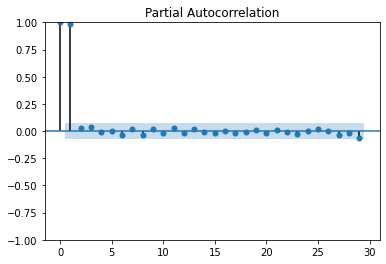

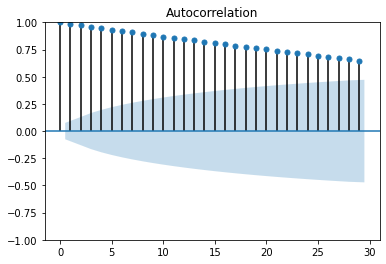

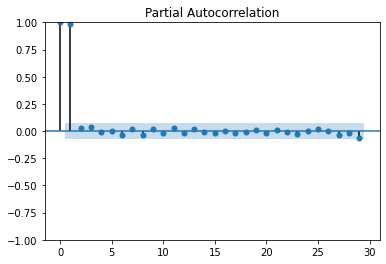

In [23]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df
#plot_acf(df['Adj Close'], lags=20, alpha=0.05)
#plot_acf(test_data, lags=20, alpha=0.05)
#plot_pacf(test_data, lags=20, alpha=0.05)
plot_acf(test_data)
plot_pacf(test_data)

In [24]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#print(acf(df['Adj Close']))
print(acf(test_data))
print(pacf(test_data))

[1.         0.98534526 0.97166676 0.9591563  0.94664175 0.93415916
 0.9208286  0.90832171 0.89501498 0.88248981 0.86969688 0.85775027
 0.8456626  0.83399324 0.82235162 0.81038316 0.79869896 0.78667775
 0.77466535 0.76308303 0.75126769 0.73992844 0.72844931 0.71644819
 0.70462681 0.69354806 0.6827099  0.67108975 0.65923189]
[ 1.          0.98680937  0.02922477  0.03847022 -0.00393628 -0.0038355
 -0.03966584  0.02185665 -0.03903541  0.0229459  -0.01872622  0.02857887
 -0.0135979   0.01497829 -0.00949747 -0.01454629 -0.00208406 -0.01690109
 -0.01173536  0.01175262 -0.01726148  0.01357574 -0.01171084 -0.02700345
 -0.0030571   0.02102566  0.00227963 -0.03360944 -0.01948022]


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


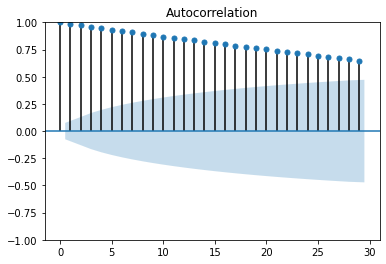

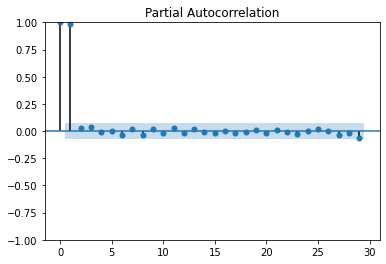

In [25]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
#plot_acf(data_df['Adj Close'], lags= 30)
#plot_acf(data_df['Adj Close'])
plot_acf(test_data)
#plot PACF
#plot_pacf(data_df['Adj Close'], lags=30)
#plot_pacf(data_df['Adj Close'])
plot_pacf(test_data)
plt.show()

In [26]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model_sarima = auto_arima(test_data, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_sarima.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=6.91 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=3742.787, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=3560.550, Time=0.86 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=5.58 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=3744.475, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=3485.459, Time=2.66 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=12.42 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=6.21 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=3483.819, Time=2.62 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=3558.567, Time=0.87 sec
 ARIMA(0,1,0)(2,1,1)[24]             : AIC=inf, Time=12.10 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=4.77 sec
 ARIMA(0,1,1)(2,1,0)[24]             : AIC=3485.431, Time=3.27 sec
 ARIMA(1,1,1)(2,1,0)[24]             : AIC=3486.378, Time=8.68 sec
 ARIMA(0,1,0)(2,1,0)[24] intercept   : AIC=3485

In [27]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  674
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 24)   Log Likelihood               -1738.910
Date:                            Tue, 15 Feb 2022   AIC                           3483.819
Time:                                    14:03:14   BIC                           3497.245
Sample:                                         0   HQIC                          3489.027
                                            - 674                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L24      -0.6786      0.033    -20.539      0.000      -0.743      -0.614
ar.S.L48      -0.3382      0.030    -11.258      0.000      -0.397      -0.279
sigma2        12.1931      0.456     26.745      0.000      11.300      13.087
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               185.56
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

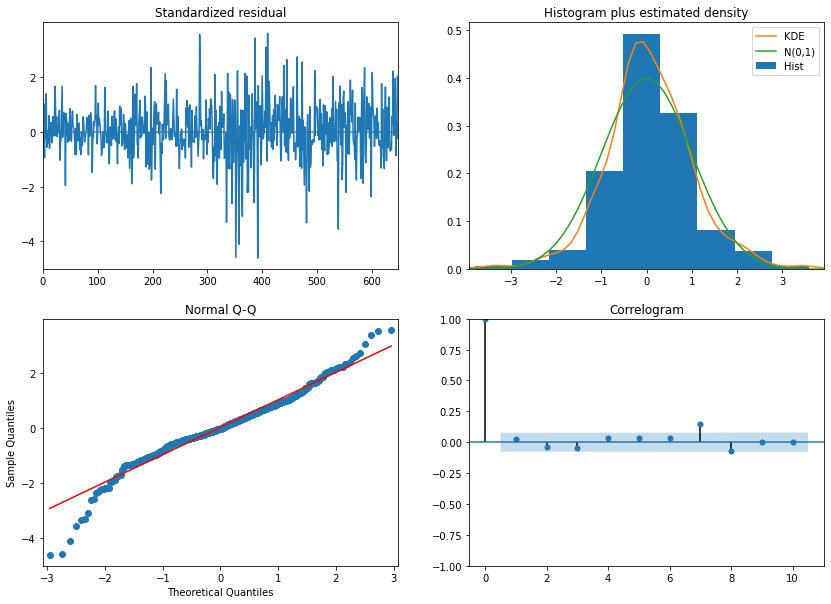

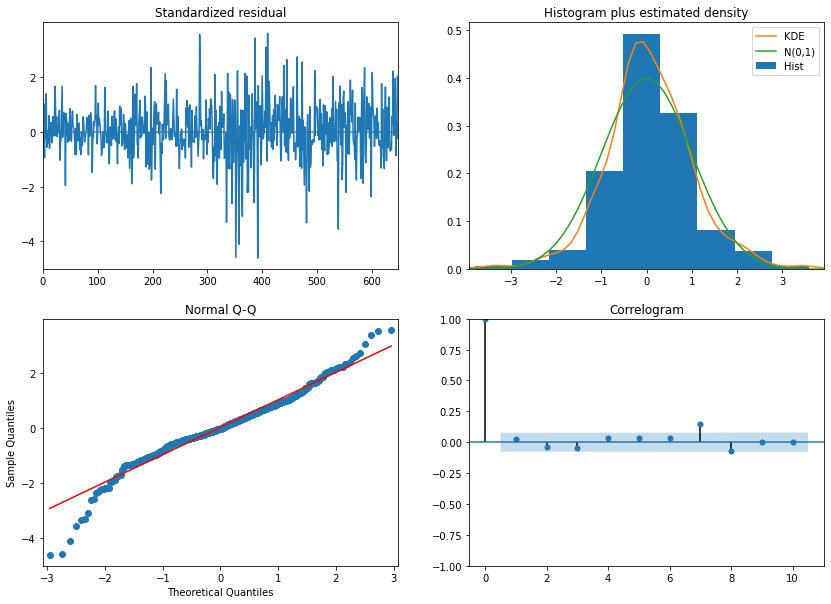

In [28]:
model_sarima.plot_diagnostics(figsize=(14,10))

In [29]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(2,1,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                  674
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -1701.395
Date:                             Tue, 15 Feb 2022   AIC                           3412.791
Time:                                     14:04:33   BIC                           3435.067
Sample:                                          0   HQIC                          3421.440
                                             - 674                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7367      0.219     -3.364      0.001      -1.166      -0.307
ma.L1          0.7689      

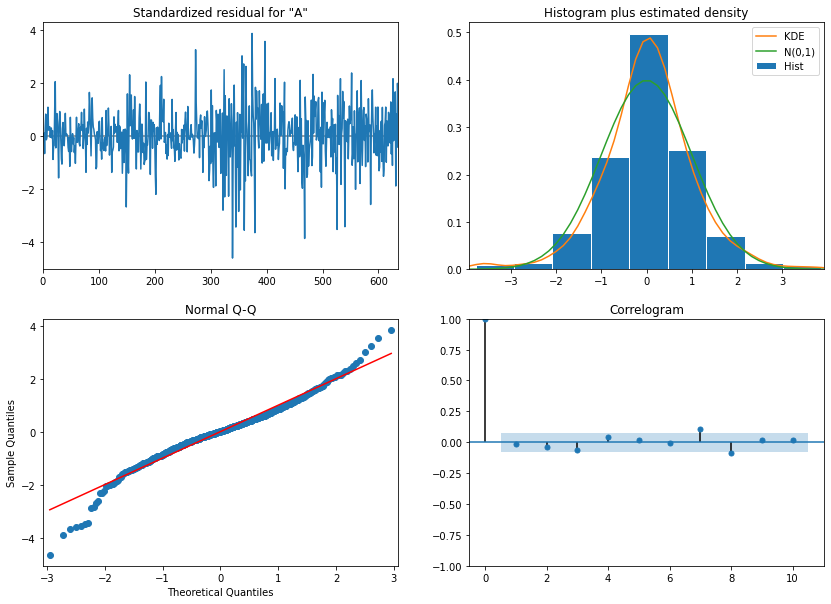

In [30]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [31]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(2,1,0,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                  674
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 24)   Log Likelihood               -1614.804
Date:                             Tue, 15 Feb 2022   AIC                           3239.607
Time:                                     14:07:36   BIC                           3261.592
Sample:                                          0   HQIC                          3248.165
                                             - 674                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8098      0.463      1.750      0.080      -0.097       1.717
ma.L1         -0.7949      

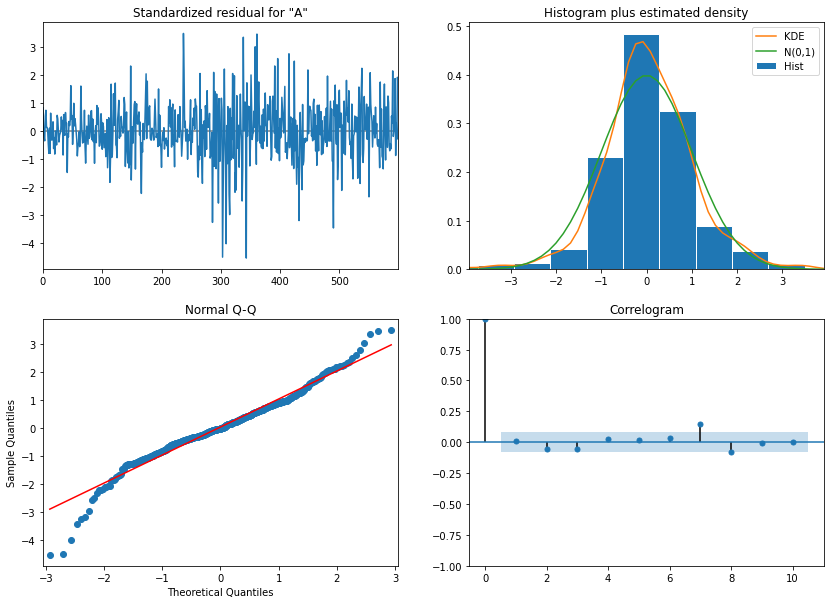

In [32]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

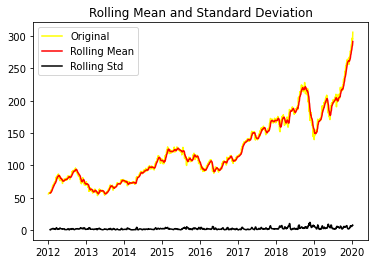

Results of fuller test
Test Statistics                   1.745324
p-value                           0.998234
No. of lags used                  9.000000
Number of observations used    2008.000000
critical value (1%)              -3.433611
critical value (5%)              -2.862980
critical value (10%)             -2.567537
dtype: float64


In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Adj Close'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


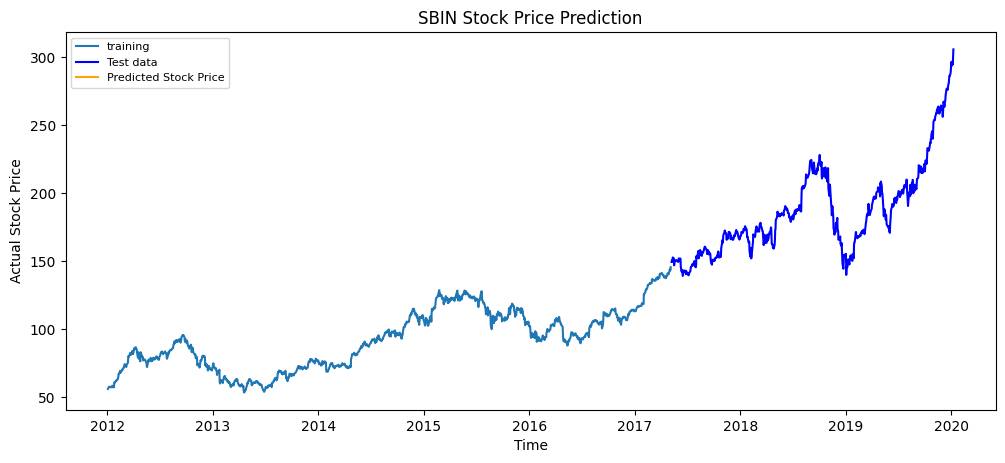

In [73]:
# Forecast
#fc, se, conf = results.forecast(519, alpha=0.05)  # 95% confidence
fc = results.forecast(674, alpha=0.05)
#fc = results.forecast(len(test_data))
conf = results.forecast(len(test_data))

#fc_series = pd.Series(fc, index=test_data.index)
fc_series = pd.Series(fc,lim_df[train_end:], df['Adj Close'])

lower_series = pd.Series(lim_df[: train_end], df['Adj Close'])
upper_series = pd.Series(lim_df[train_end:], df['Adj Close'])

#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)


#lower_series = pd.Series(lim_df[: train_end], index=test_data.index)
#upper_series = pd.Series(lim_df[train_end:], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [61]:
print(len(test_data))
test_data

674


Date
2017-05-08    149.484283
2017-05-09    150.441696
2017-05-10    149.728500
2017-05-11    150.557343
2017-05-12    152.659958
                 ...    
2020-01-03    293.598297
2020-01-06    295.937744
2020-01-07    294.545959
2020-01-08    299.284088
2020-01-09    305.641113
Name: Adj Close, Length: 674, dtype: float64

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get the predictions and residuals
#pred = results.forecast(len(test_data))
pred = results.forecast(674)
#predictions = model_sarima.predict(len(test_data))
print(pred)

#pred = pd.Series(predictions, index=test_data.index)
#predictions = pd.Series(predictions, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
predictions = pd.Series(pred.values, index=df[train_end + timedelta(days=1):test_end].index)
#predictions = pd.Series(pred, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions
#predictions = pd.Series(pred, index=df[1345:]['Adj Close'].index)
predictions
#residuals = test_data - predictions
#residuals =  predictions - test_data
#residuals


674      308.475505
675      314.360940
676      314.151070
677      312.626844
678      314.083251
           ...     
1343    1243.861983
1344    1243.607424
1345    1247.468230
1346    1251.076136
1347    1256.868948
Name: predicted_mean, Length: 674, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Date
2017-05-08     308.475505
2017-05-09     314.360940
2017-05-10     314.151070
2017-05-11     312.626844
2017-05-12     314.083251
                 ...     
2020-01-03    1243.861983
2020-01-06    1243.607424
2020-01-07    1247.468230
2020-01-08    1251.076136
2020-01-09    1256.868948
Length: 674, dtype: float64

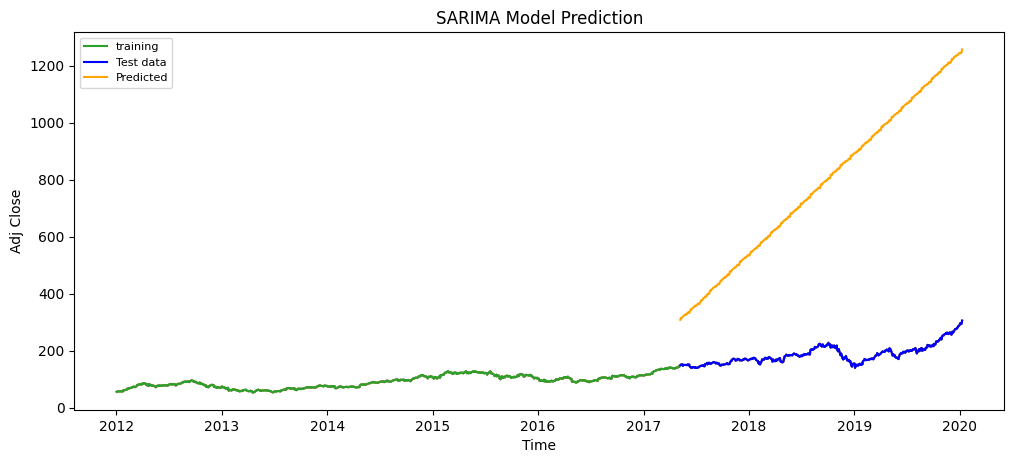

In [50]:
plt.figure(figsize=(12,5), dpi=100)
#plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(predictions, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)
plt.show()

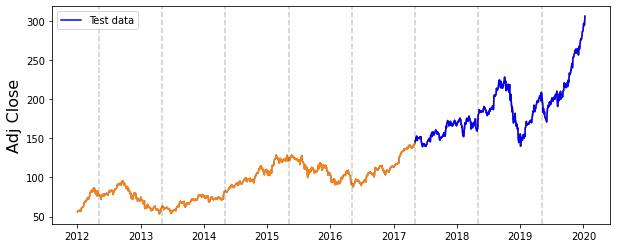

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

#plt.plot(lim_df[train_end:]['Adj Close'],'blue',label= 'Test data')
plt.plot(lim_df[train_end:],'blue',label= 'Test data')
#plt.plot(test_data)

#plt.plot(predictions)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-05-05'), color='k', linestyle='--', alpha=0.2)

plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình
print('MAPE', round(np.mean(abs(residuals/test_data)),4))

MAPE nan


In [ ]:
print('RMSE', np.sqrt(np.mean(residuals**2)))

RMSE nan


In [ ]:
# Confidence Intervals of the forecasted values
#forecast_ci = forecast_values.conf_int()

# Forcast 12 steps ahead
forecast_values = results.get_forecast(steps= 12)
#forecast_values = model_sarima.get_prediction(steps= 12)

#Prediction summary
#forecast_values.summary_frame()


#Prediction
model_predict = forecast_values.predicted_mean

#Confidence interval
pred_ci = forecast_values.conf_int()
#plot the data
ax = df['Adj Close'].plot(label='Observed', figsize=(14,7))
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
model_predict.plot(ax=ax, label='Predictions', alpha=.7, figsize=(14,7))

#ax = df['Adj Close'].plot()
#ax = results.get_prediction(start=pd.to_datetime('2017-05-05'), dynamic=False)
#ax = results.predict(start= pd.to_datetime('2017-05-05'),end= pd.to_datetime('2020-01-09'), dynamic= True)
#ax = results.get_prediction(start= train_end,end=test_end)
#ax = results.get_prediction(test_data)
#ax = results.get_prediction(df['Adj Close'])

#ax = results.get_forecast(df['Adj Close'])
#plot the forecasted values
#forecast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#forecast_values.predicted_mean.plot(ax=ax)

#Plot the Confidence Intervals
#ax.fill_between(forecast_ci.index,
'''                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='r', alpha=.2)'''

#Axes labels and Title
'''ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')'''
plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình
print('MAPE', round(np.mean(abs(residuals/test_data)),4))

MAPE nan


In [ ]:
print('RMSE', np.sqrt(np.mean(residuals**2)))

RMSE nan


In [ ]:
# Forcast 50 steps ahead
forecast_values = results.get_forecast(steps= 50)

# Confidence Intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

In [ ]:
# Forcast 12 steps ahead
forecast_values = results.get_forecast(steps= 12)

#Prediction summary
forecast_values.summary_frame()

In [ ]:
#Prediction
model_predict = forecast_values.predicted_mean

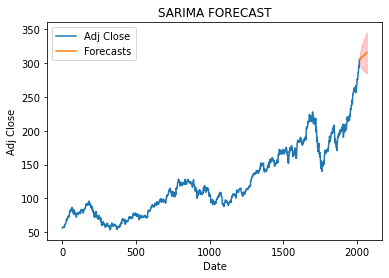

In [ ]:
#Confidence interval
pred_ci = forecast_values.conf_int()
#plot the data
ax = df['Adj Close'].plot()
#ax = results.get_prediction(start=pd.to_datetime('2017-05-05'), dynamic=False)
#ax = results.predict(start= pd.to_datetime('2017-05-05'),end= pd.to_datetime('2020-01-09'), dynamic= True)
#ax = results.get_prediction(start= train_end,end=test_end)

#plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#Plot the Confidence Intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='r', alpha=.2)

#Axes labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')
plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình
y_forecasted = forecast_values.predicted_mean
#y_truth = y['2018-06-01':]
#y_truth = train_data
y_truth = lim_df[train_end:test_end]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
mape = np.mean(np.abs(np.array(model_predict[:-979]) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))